In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pk

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


In [15]:
# Load the dataset (make sure the CSV file is in the same folder)
df = pd.read_csv("Car dekho - Car dekho.csv")

# Show top 5 rows
df.head()


,Name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Alto 800 LXI Opt,2023,410000,10000,Petrol,Individual,Manual,First Owner,19.03 kmpl,999 CC,71.01 bhp,96Nm,5.0
1,Skoda Slavia 1.0 TSI Ambition,2023,1350000,10000,Petrol,Individual,Manual,First Owner,14.08 kmpl,1956 CC,167.67 bhp,350nm,5.0
2,BMW 3 Series Gran Limousine 320Ld Luxury Line,2023,5800000,1000,Diesel,Dealer,Automatic,First Owner,18.15 kmpl,998 CC,118.35 bhp,172Nm,5.0
3,MG ZS EV Exclusive,2023,2650000,10000,Electric,Dealer,Automatic,First Owner,32.52 kmpl,998 CC,58.33 bhp,78Nm,5.0
4,Tata Punch Adventure,2023,715000,10000,Petrol,Individual,Manual,First Owner,12.15 kmpl,1451 CC,141 bhp,250Nm,5.0


In [16]:
# Drop missing values
df.dropna(inplace=True)

# Extract brand from 'Name' column
df['Name'] = df['Name'].apply(lambda x: str(x).split(' ')[0])

# Define mappings
name_mapping = {
    'Maruti':1, 'Skoda':2, 'BMW':3, 'MG':4, 'Tata':5, 'Hyundai':6, 'Renault':7, 'Mahindra':8,
    'Nissan':9, 'Datsun':10, 'Ford':11, 'Honda':12, 'Kia':13, 'Toyota':14, 'Volkswagen':15, 'Audi':16,
    'Isuzu':17, 'Jeep':18, 'Land':19, 'Lexus':20, 'Mercedes-Benz':21, 'Volvo':22, 'Force':23, 'Chevrolet':24,
    'Jaguar':25, 'Fiat':26, 'Mitsubishi':27, 'Ashok':28, 'Ambassador':29, 'Daewoo':30, 'Opel':31
}
owner_mapping = {
    'First Owner':1, 'Second Owner':2, 'Test Drive Car':3, 'Third Owner':4, 'Fourth & Above Owner':5
}
fuel_mapping = {'Petrol':1, 'Diesel':2, 'Electric':3, 'CNG':4, 'LPG':5}
seller_mapping = {'Individual':1, 'Dealer':2, 'Trustmark Dealer':3}
transmission_mapping = {'Manual':1, 'Automatic':2}

# Apply mappings
df['Name'] = df['Name'].map(name_mapping)
df['owner'] = df['owner'].map(owner_mapping)
df['fuel'] = df['fuel'].map(fuel_mapping)
df['seller_type'] = df['seller_type'].map(seller_mapping)
df['transmission'] = df['transmission'].map(transmission_mapping)

# Extract numeric values from 'mileage' and 'engine'
df['mileage'] = df['mileage'].str.extract('(\d+\.\d+|\d+)').astype(float)
df['engine'] = df['engine'].str.extract('(\d+\.\d+|\d+)').astype(float)

# Drop rows with missing values after cleaning
df.dropna(inplace=True)

# Preview cleaned data
df.head()


<>:29: SyntaxWarning: invalid escape sequence '\d'
<>:30: SyntaxWarning: invalid escape sequence '\d'
<>:29: SyntaxWarning: invalid escape sequence '\d'
<>:30: SyntaxWarning: invalid escape sequence '\d'
C:\Users\purwa\AppData\Local\Temp\ipykernel_11692\1158551577.py:29: SyntaxWarning: invalid escape sequence '\d'
  df['mileage'] = df['mileage'].str.extract('(\d+\.\d+|\d+)').astype(float)
C:\Users\purwa\AppData\Local\Temp\ipykernel_11692\1158551577.py:30: SyntaxWarning: invalid escape sequence '\d'
  df['engine'] = df['engine'].str.extract('(\d+\.\d+|\d+)').astype(float)


,Name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,1,2023,410000,10000,1,1,1,1,19.03,999.0,71.01 bhp,96Nm,5.0
1,2,2023,1350000,10000,1,1,1,1,14.08,1956.0,167.67 bhp,350nm,5.0
2,3,2023,5800000,1000,2,2,2,1,18.15,998.0,118.35 bhp,172Nm,5.0
3,4,2023,2650000,10000,3,2,2,1,32.52,998.0,58.33 bhp,78Nm,5.0
4,5,2023,715000,10000,1,1,1,1,12.15,1451.0,141 bhp,250Nm,5.0


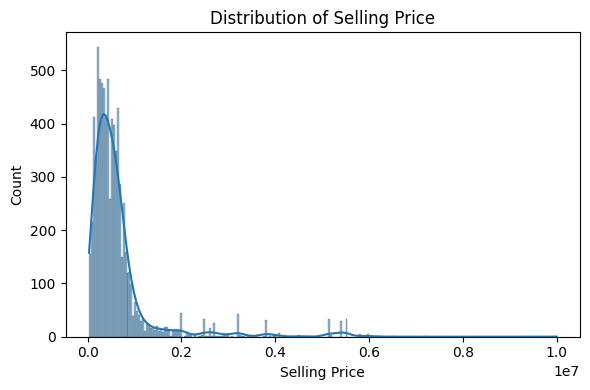

In [17]:
# Plot distribution of selling price
plt.figure(figsize=(6, 4))
sns.histplot(df['selling_price'], kde=True)
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.tight_layout()
plt.show()

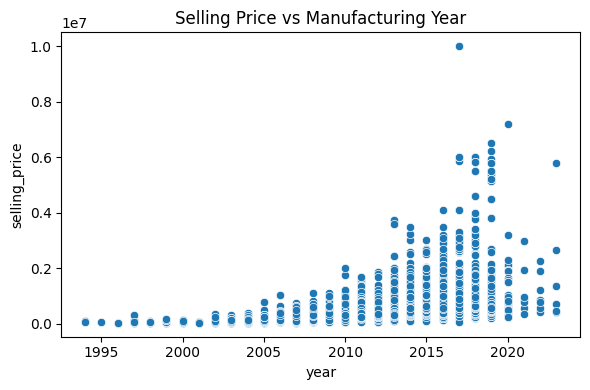

In [18]:

# Scatter plot: Year vs Selling Price
plt.figure(figsize=(6, 4))
sns.scatterplot(x='year', y='selling_price', data=df)
plt.title('Selling Price vs Manufacturing Year')
plt.tight_layout()
plt.show()

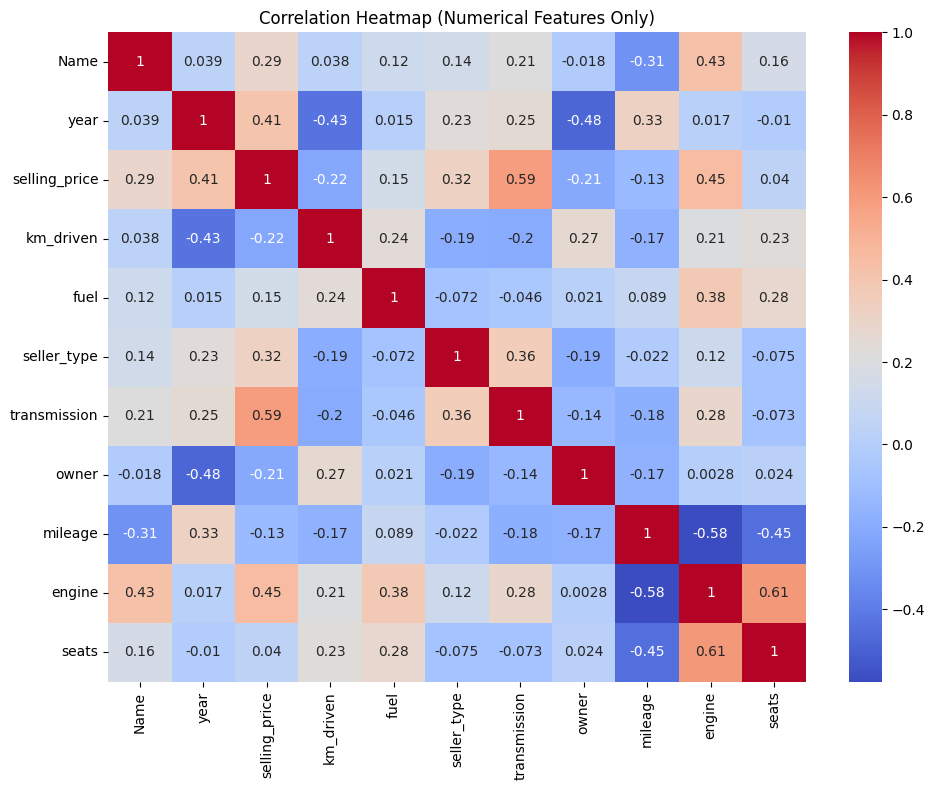

In [19]:
# Fix: Correlation heatmap only with numeric columns
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Numerical Features Only)')
plt.tight_layout()
plt.show()

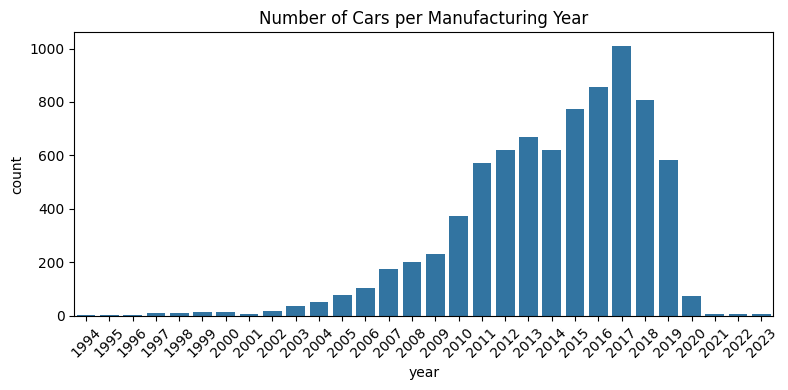

In [20]:
# Distribution of car manufacturing years
plt.figure(figsize=(8, 4))
sns.countplot(x='year', data=df, order=sorted(df['year'].unique()))
plt.title("Number of Cars per Manufacturing Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

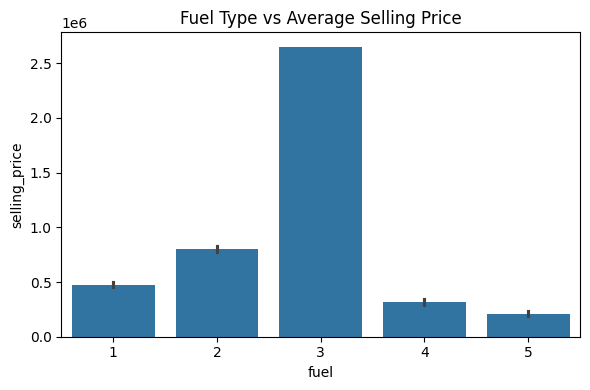

In [21]:
# Fuel type vs average selling price
plt.figure(figsize=(6, 4))
sns.barplot(x='fuel', y='selling_price', data=df)
plt.title("Fuel Type vs Average Selling Price")
plt.tight_layout()
plt.show()

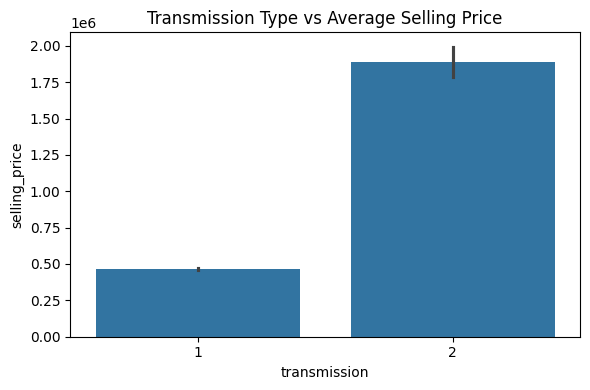

In [22]:
# Transmission vs average price
plt.figure(figsize=(6, 4))
sns.barplot(x='transmission', y='selling_price', data=df)
plt.title("Transmission Type vs Average Selling Price")
plt.tight_layout()
plt.show()

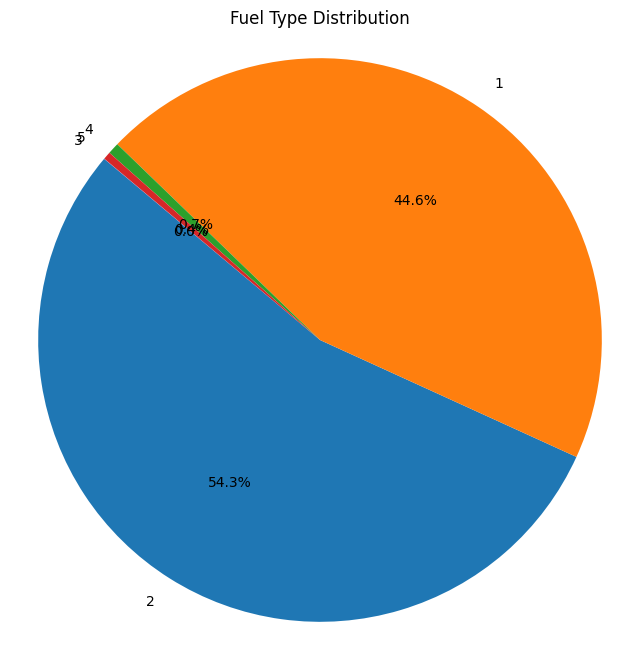

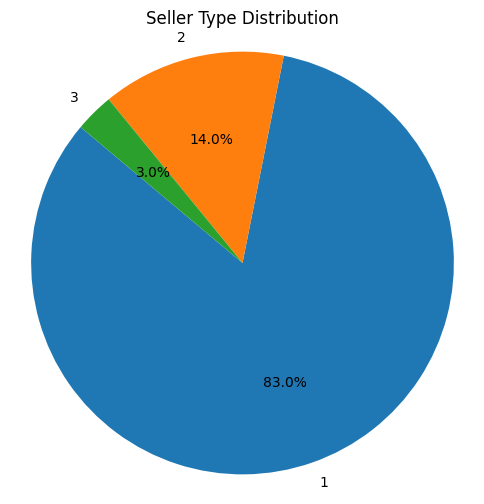

In [23]:
# Pie chart for Fuel Type Distribution
plt.figure(figsize=(8, 8))
fuel_counts = df['fuel'].value_counts()
plt.pie(fuel_counts, labels=fuel_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Fuel Type Distribution')
plt.axis('equal')
plt.show()


# Pie chart for Seller Type
plt.figure(figsize=(6, 6))
seller_counts = df['seller_type'].value_counts()
plt.pie(seller_counts, labels=seller_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Seller Type Distribution')
plt.axis('equal')
plt.show()


In [24]:
from sklearn.ensemble import RandomForestRegressor

# Drop problematic or unused columns
df.drop(columns=['torque', 'power'], inplace=True, errors='ignore')

# Define input features and target
X = df[['Name', 'year', 'km_driven', 'fuel', 'seller_type',
        'transmission', 'owner', 'mileage', 'engine', 'seats']]
y = df['selling_price']

# Split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
from sklearn.metrics import r2_score, mean_squared_error
y_pred = rf_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(" Random Forest Model Trained")
print(f" R² Score: {r2:.4f}")
print(f" Mean Squared Error: {mse:.2f}")


 Random Forest Model Trained
 R² Score: 0.9128
 Mean Squared Error: 63232848857.42


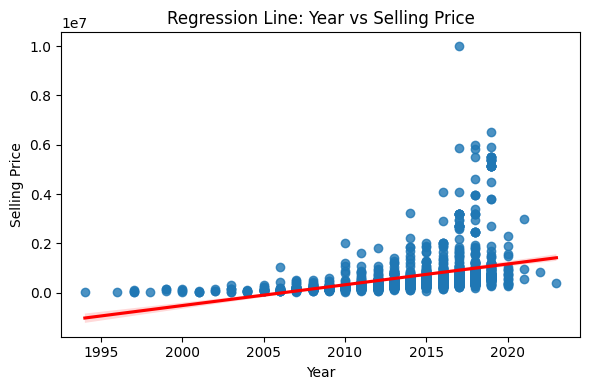

In [25]:
# Plot regression line for 'year' vs 'selling_price'
plt.figure(figsize=(6, 4))
sns.regplot(x=X_test['year'], y=y_test, line_kws={"color": "red"})
plt.title('Regression Line: Year vs Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.tight_layout()
plt.show()


In [26]:
# Save the trained model to a .pkl file
with open("model.pkl", "wb") as f:
    pk.dump(rf_model, f)

print("Model saved as 'model.pkl'")


Model saved as 'model.pkl'
